In [94]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

# 1. Preprocessing the data

Is our data normal? Before any statistical analysis the data needs to be check for normality, in order to be able to choose the proper analysis. For this analysis the easiest way to check for normality first is by visual graphs, in this case a Q-Q plot is used. <br>

A **Q-Q plot** or quartile/quartile plot is a simple comparison of a measurment data-set on the *y-axis* plotted against the *z-score* of a normal distribution of the same size on the *x-axis* (http://iopscience.iop.org.tudelft.idm.oclc.org/article/10.1088/1752-7155/10/3/035001/pdf). <br>
What it does is that it takes every point and converts it into a quantile and then it compares it to a normal distribution, in the *y-axis* we see the data quantile and in the *x-axis* the theoretical quantile, if the data is not normal it would not follow the 45 degree line and a stange plot of the data would appear, and then the data should be checked for logarithmic or other types of data, in this case we can confirm visualy that the data is indeed normal, hence we can proceed with our statistical analysis. 

## 1.1 Q-Q PLOT (is the data normal?)

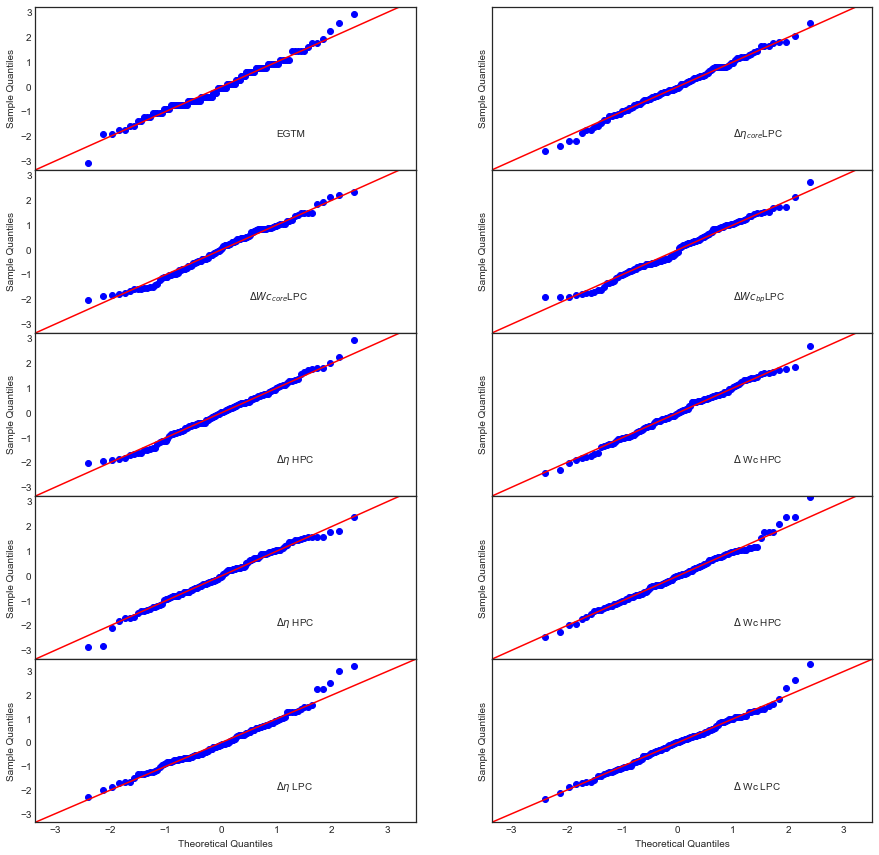

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import statsmodels.api as sm
import pandas as pd

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6), (ax7, ax8),(ax9, ax10)) = plt.subplots(5,2,sharex='col', sharey='row',figsize=(15,15))

sm.qqplot(df['EGTM'], fit=True, line='45', ax=ax1)
ax1.annotate('EGTM', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dEta_is_c_LPC_2 [%]'], fit=True, line='45',ax=ax2)
ax2.annotate('$\Delta \eta_{core}$LPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dWc_c_LPC_2 [%]'], fit=True, line='45',ax=ax3)
ax3.annotate('$\Delta Wc_{core}$LPC', xy=(-2, -2), xytext=(0.5, -2))

sm.qqplot(df['dWc_d_LPC_2 [%]'], fit=True, line='45',ax=ax4)
ax4.annotate('$\Delta Wc_{bp}$LPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dEta_is_HPC_2 [%]'], fit=True, line='45',ax=ax5)
ax5.annotate('$\Delta\eta$ HPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dWc_HPC_2 [%]'], fit=True, line='45',ax=ax6)
ax6.annotate('$\Delta$ Wc HPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dEta_is_HPT_2 [%]'], fit=True, line='45',ax=ax7)
ax7.annotate('$\Delta \eta$ HPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dWc_HPT_2 [%]'], fit=True, line='45',ax=ax8)
ax8.annotate('$\Delta$ Wc HPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dEta_is_LPT_2 [%]'], fit=True, line='45',ax=ax9)
ax9.annotate('$\Delta \eta$ LPC', xy=(-2, -2), xytext=(1, -2))

sm.qqplot(df['dWc_LPT_2 [%]'], fit=True, line='45',ax=ax10)
ax10.annotate('$\Delta$ Wc LPC', xy=(-2, -2), xytext=(1, -2))


fig.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)


**Remarks**<br>
For the EGTM, the $\Delta$ Wc HPC, $\Delta\eta$ LPC and $\Delta$ Wc LPC we can observe a "light" tail. <br>
*Further analysis should be made in order to know if this would affect the result of the PCA*<br>


## 1.2 Matrix Visualization

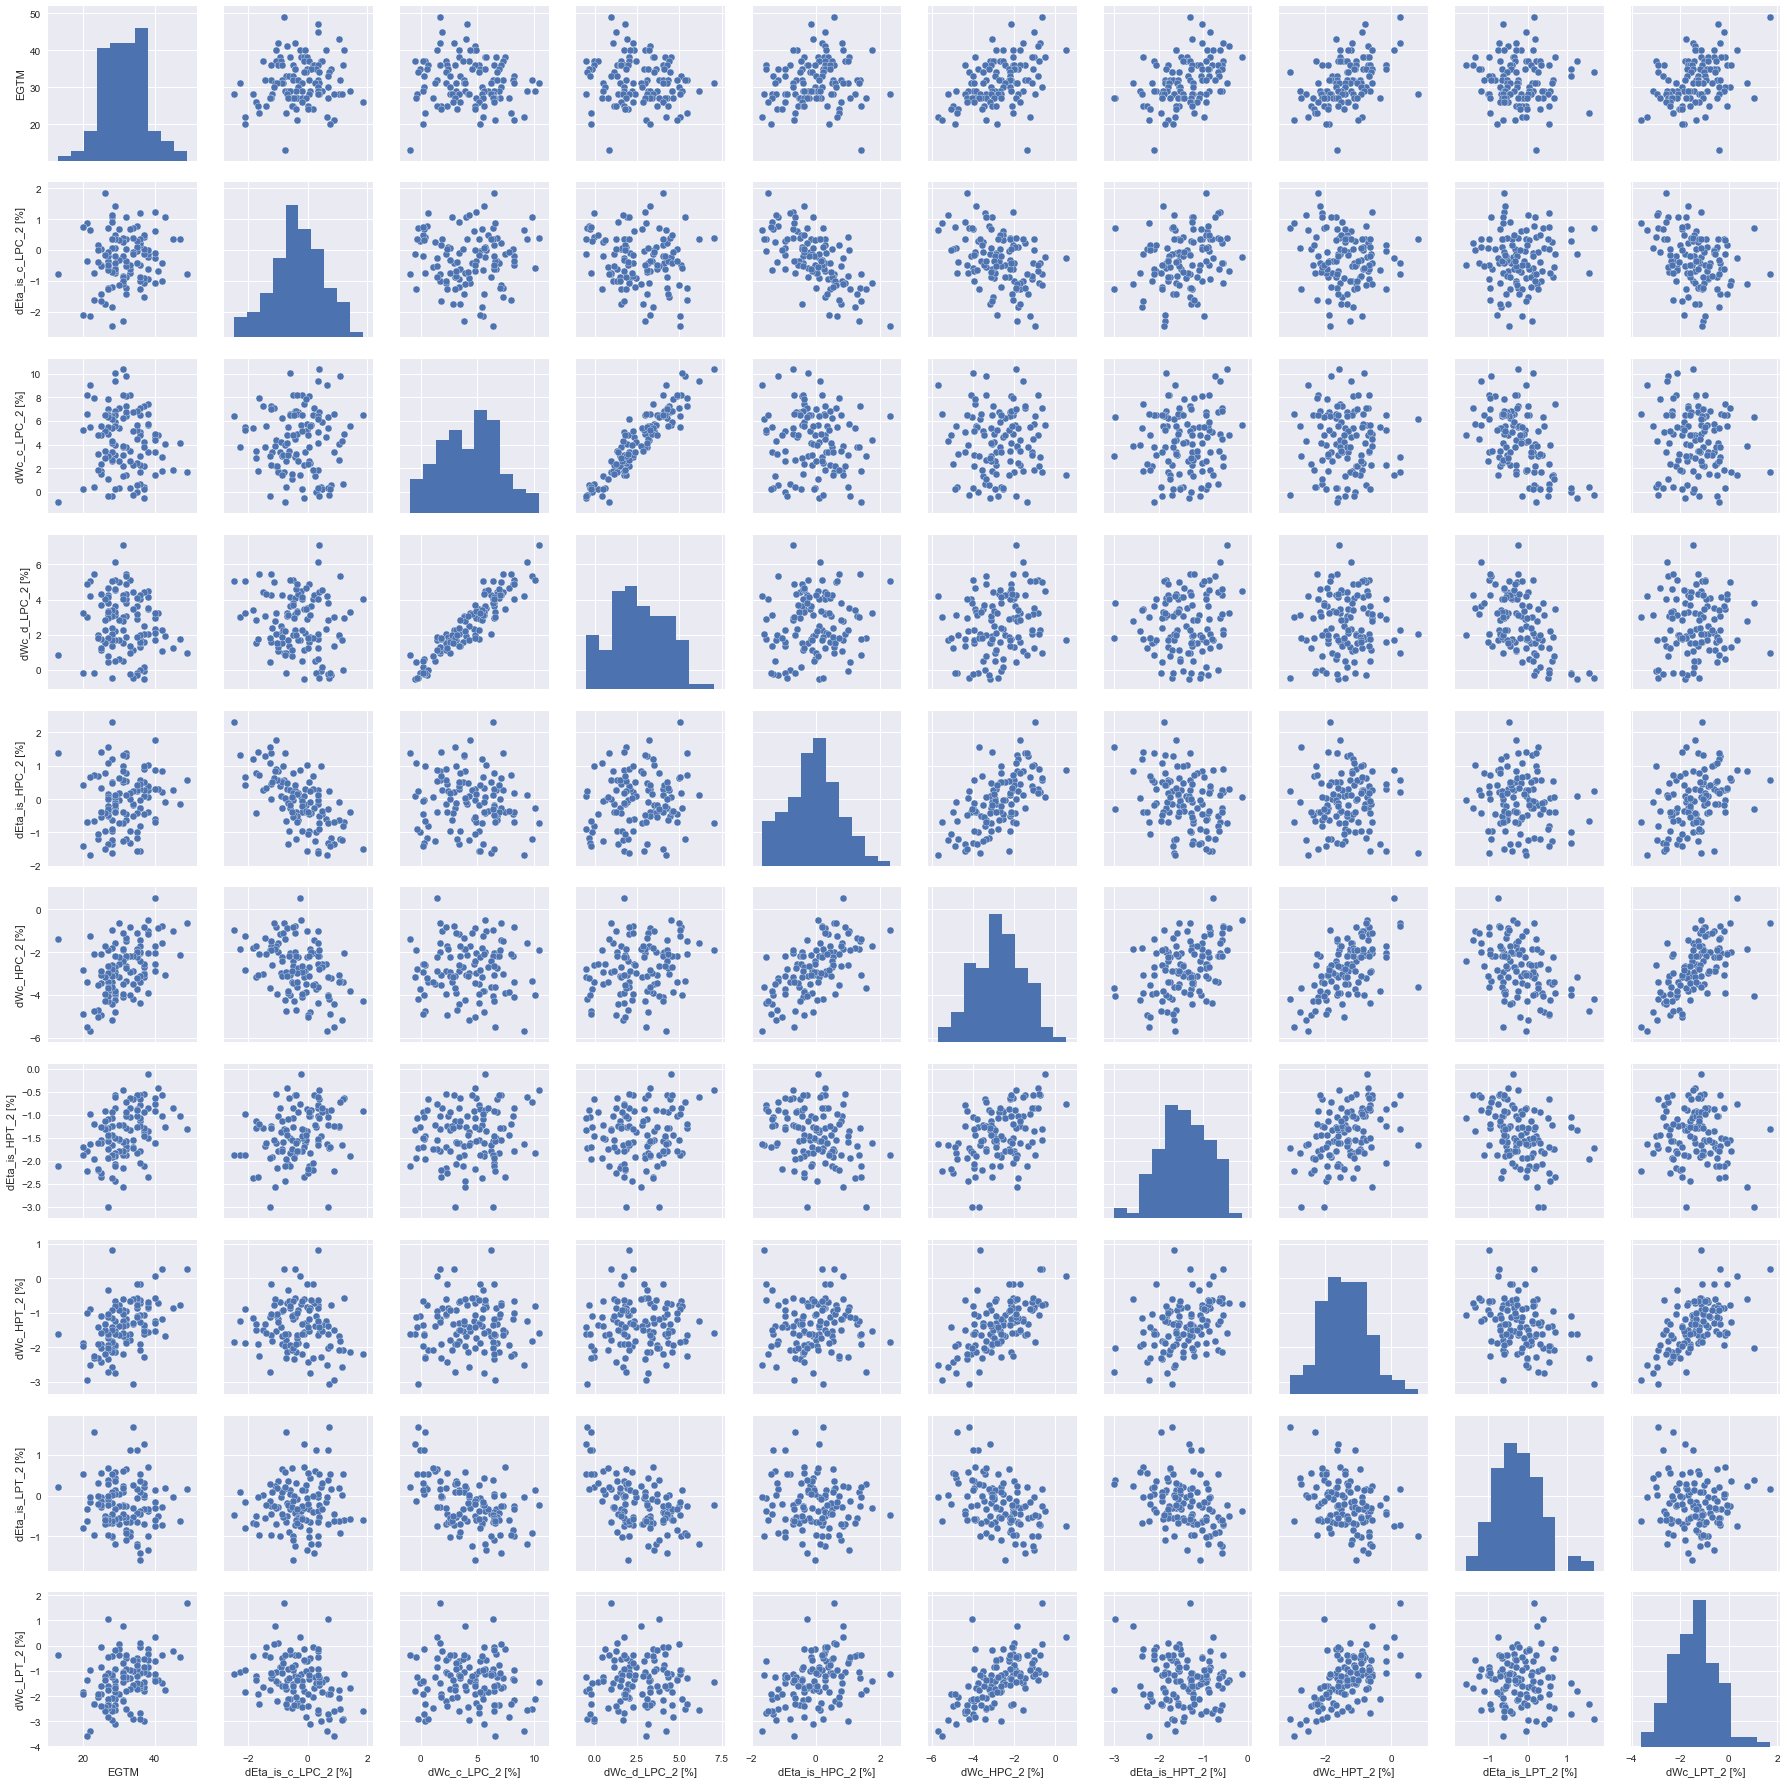

In [60]:
%matplotlib inline
import seaborn as sns
import pandas as pd


df = pd.read_excel("//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx","CASE-A")
data = df[['EGTM','dEta_is_c_LPC_2 [%]','dWc_c_LPC_2 [%]','dWc_d_LPC_2 [%]','dEta_is_HPC_2 [%]','dWc_HPC_2 [%]','dEta_is_HPT_2 [%]','dWc_HPT_2 [%]','dEta_is_LPT_2 [%]','dWc_LPT_2 [%]']]

sns.pairplot(data=data)

## 1. 3 Individual plots (EGTM vs AM)

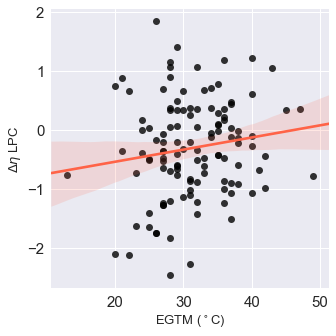

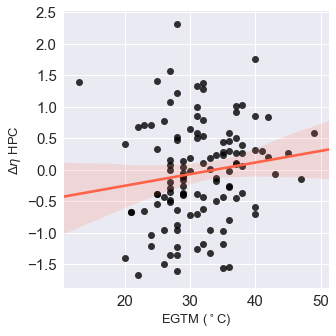

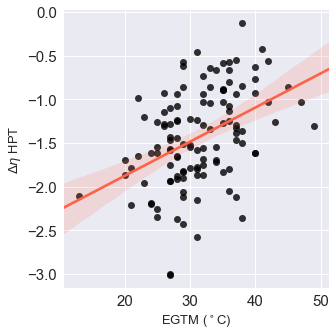

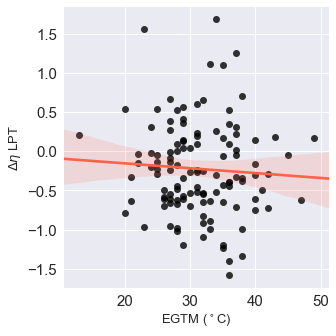

In [65]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

sns.set(font_scale = 1.5)
sns.lmplot(x="EGTM", y="dEta_is_c_LPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPC',fontsize=13)

sns.lmplot(x="EGTM", y="dEta_is_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="EGTM", y="dEta_is_HPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta\eta$ HPT',fontsize=13)

sns.lmplot(x="EGTM", y="dEta_is_LPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta\eta$ LPT',fontsize=13)


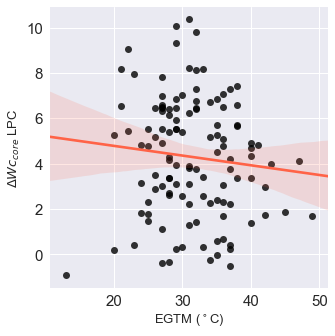

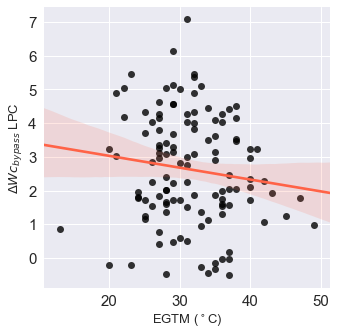

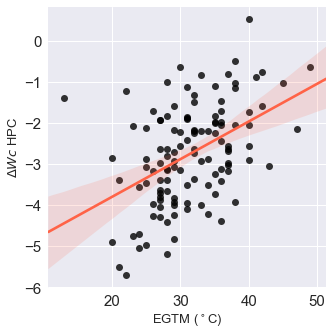

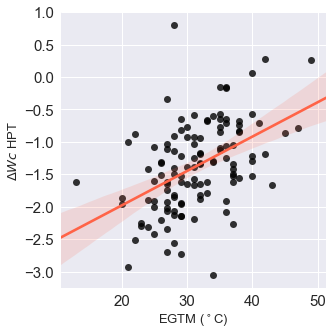

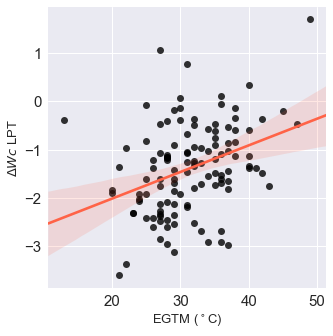

In [63]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

sns.set(font_scale = 1.5)
sns.lmplot(x="EGTM", y="dWc_c_LPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta Wc_{core}$ LPC',fontsize=13)

sns.lmplot(x="EGTM", y="dWc_d_LPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta Wc_{bypass}$ LPC',fontsize=13)

sns.lmplot(x="EGTM", y="dWc_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)

sns.lmplot(x="EGTM", y="dWc_HPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta Wc$ HPT',fontsize=13)

sns.lmplot(x="EGTM", y="dWc_LPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('EGTM ($^\circ$C)',fontsize=13)
plt.ylabel('$\Delta Wc$ LPT',fontsize=13)

# 2. Correlations

Pearson correlation coefficient is calculated as follows:<br>
$r_{pb} = \frac{\sum(x-m_x)(y-m_y)}{\sqrt(\sum(x-m_x)^2(y-m_y)^2)}$ <br>
Where $m_x$ is the mean of the vector x and $m_y$ is the mean of the vector y.

## 2.1 General Data

**Hinton diagram**<br>
The color of the boxes determines the sign of the correlation<br> 
*Red* - positive correlation<br>
*Blue* - negative correlation<br>
*Size* of box - magnitude of the correlation<br>

,FirstVariable,SecondVariable,Correlation
0,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.931060
1,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.665744
2,dWc_HPC_2 [%],dWc_LPT_2 [%],0.630054
3,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.604044
4,dWc_HPC_2 [%],dWc_HPT_2 [%],0.589334
5,dWc_HPT_2 [%],dWc_LPT_2 [%],0.586558
6,dWc_d_LPC_2 [%],dEta_is_LPT_2 [%],-0.520231
7,dWc_c_LPC_2 [%],dEta_is_LPT_2 [%],-0.511589
8,EGTM,dWc_HPT_2 [%],0.464176
9,EGTM,dWc_HPC_2 [%],0.457155


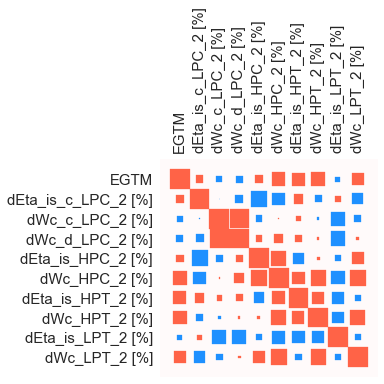

In [83]:
#%qtconsole
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet6')
corrmat = df.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df, 10)

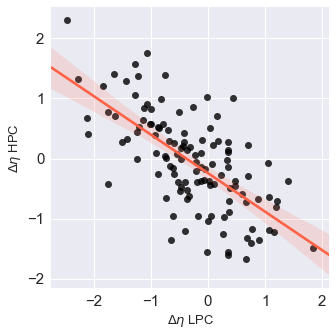

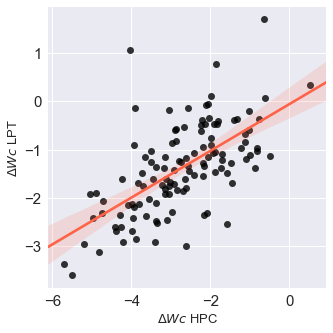

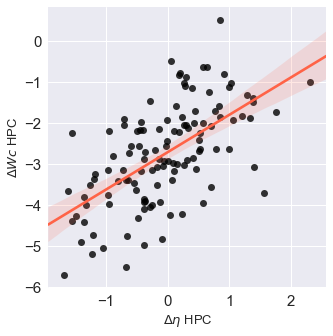

In [87]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

sns.set(font_scale = 1.5)
sns.lmplot(x="dEta_is_c_LPC_2 [%]", y="dEta_is_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ LPC',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

sns.lmplot(x="dWc_HPC_2 [%]", y="dWc_LPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta Wc$ HPC',fontsize=13)
plt.ylabel('$\Delta Wc$ LPT',fontsize=13)

sns.lmplot(x="dEta_is_HPC_2 [%]", y="dWc_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ HPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)


## 2.2 Above average [EGTM=>36]

,FirstVariable,SecondVariable,Correlation
0,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.920409
1,dWc_HPC_2 [%],dWc_HPT_2 [%],0.649509
2,dWc_HPT_2 [%],dWc_LPT_2 [%],0.614624
3,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.564492
4,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.549053
5,dWc_HPC_2 [%],dWc_LPT_2 [%],0.516361
6,dWc_HPC_2 [%],dEta_is_LPT_2 [%],-0.505477
7,dWc_HPT_2 [%],dEta_is_LPT_2 [%],-0.500531
8,EGTM,dWc_LPT_2 [%],0.488656
9,dWc_d_LPC_2 [%],dEta_is_LPT_2 [%],-0.467870


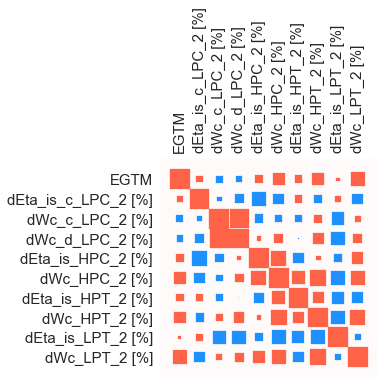

In [84]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df2 = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet7')
corrmat = df2.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df2.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df2, 10)

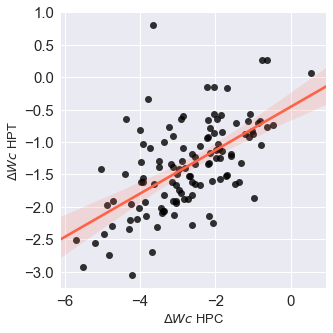

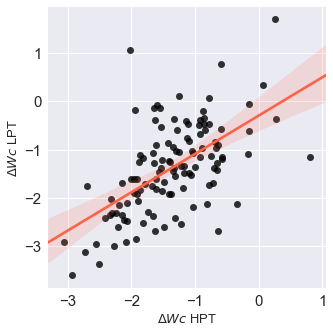

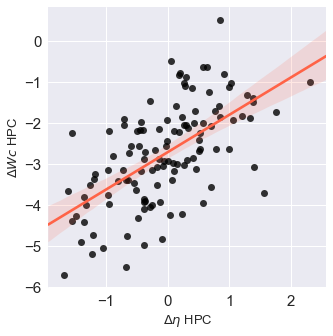

In [88]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

sns.set(font_scale = 1.5)
sns.lmplot(x="dWc_HPC_2 [%]", y="dWc_HPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta Wc$ HPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPT',fontsize=13)

sns.lmplot(x="dWc_HPT_2 [%]", y="dWc_LPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta Wc$ HPT',fontsize=13)
plt.ylabel('$\Delta Wc$ LPT',fontsize=13)

sns.lmplot(x="dEta_is_HPC_2 [%]", y="dWc_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ HPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)

For engines that are above average we have the following observations:<br>
1. What it seems to be influencing the most is, firstly the $\Delta$Wc of thr HPT and then the one of the HPC, as we keep seen both of these variables correlated in the first 3.
2. Is visible how the correlations are not high, we still se a variation in the data.
3. This information is still incomplete, no real relation between the EGTM and all variables is been concluded.
4. We can assume that the points in the cornes belong to the best EGTM, but this is wrong, proving again that this correlation matrix is not enough information.

## 2.3. Below average [EGTM=<27]

,FirstVariable,SecondVariable,Correlation
0,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.903803
1,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.714909
2,dEta_is_c_LPC_2 [%],dWc_HPC_2 [%],-0.708498
3,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.656731
4,dWc_d_LPC_2 [%],dEta_is_LPT_2 [%],-0.634646
5,dWc_HPC_2 [%],dWc_LPT_2 [%],0.594940
6,dWc_c_LPC_2 [%],dEta_is_LPT_2 [%],-0.587929
7,dWc_HPC_2 [%],dWc_HPT_2 [%],0.521837
8,dEta_is_HPT_2 [%],dWc_HPT_2 [%],0.480981
9,dEta_is_HPT_2 [%],dEta_is_LPT_2 [%],-0.476227


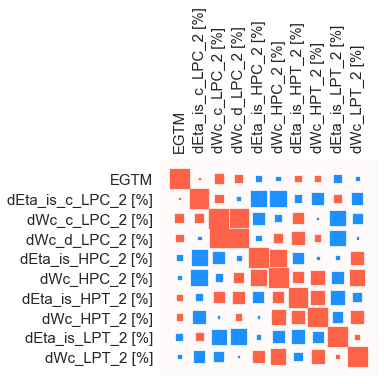

In [85]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df3 = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet8')
corrmat = df3.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df3.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df3, 10)

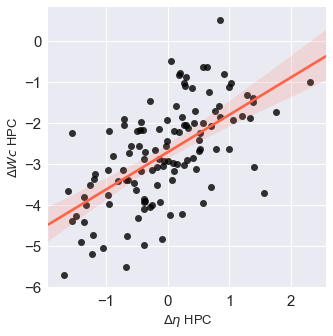

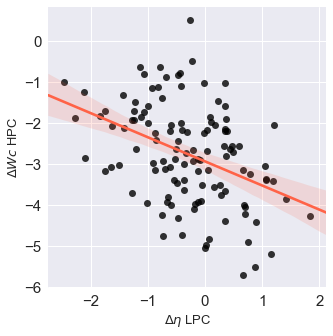

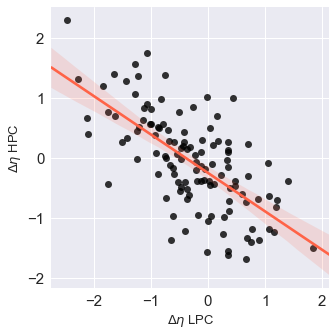

In [89]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

sns.set(font_scale = 1.5)
sns.lmplot(x="dEta_is_HPC_2 [%]", y="dWc_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ HPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)

sns.lmplot(x="dEta_is_c_LPC_2 [%]", y="dWc_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ LPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)

sns.lmplot(x="dEta_is_c_LPC_2 [%]", y="dEta_is_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ LPC',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

## 2.4. Regular [28<=EGTM<=35]

,FirstVariable,SecondVariable,Correlation
0,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.947439
1,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.796230
2,dWc_HPC_2 [%],dWc_LPT_2 [%],0.622312
3,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.550841
4,dWc_c_LPC_2 [%],dEta_is_LPT_2 [%],-0.545890
5,dWc_HPT_2 [%],dWc_LPT_2 [%],0.539440
6,dWc_d_LPC_2 [%],dEta_is_LPT_2 [%],-0.526562
7,dEta_is_c_LPC_2 [%],dWc_HPC_2 [%],-0.516127
8,dEta_is_HPC_2 [%],dEta_is_HPT_2 [%],-0.495206
9,dWc_HPC_2 [%],dEta_is_LPT_2 [%],-0.479356


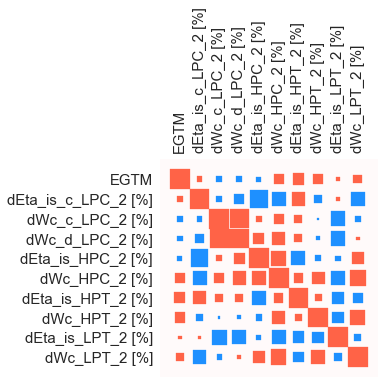

In [86]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df4 = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet9')
corrmat = df4.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df4.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df4, 10)

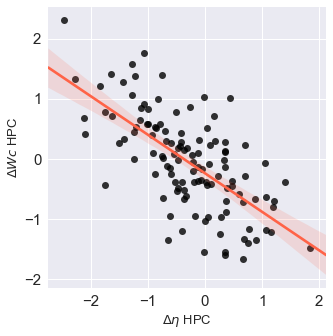

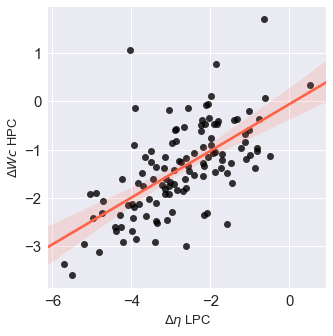

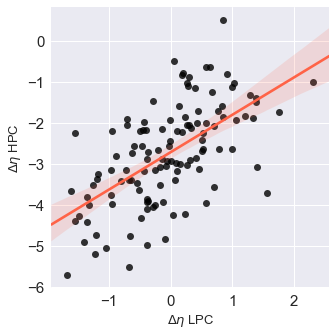

In [90]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'CASE-A')

sns.set(font_scale = 1.5)
sns.lmplot(x="dEta_is_c_LPC_2 [%]", y="dEta_is_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ HPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)

sns.lmplot(x="dWc_HPC_2 [%]", y="dWc_LPT_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ LPC',fontsize=13)
plt.ylabel('$\Delta Wc$ HPC',fontsize=13)

sns.lmplot(x="dEta_is_HPC_2 [%]", y="dWc_HPC_2 [%]", data=df, fit_reg=True, legend=False, scatter_kws={'color': 'black'}, line_kws={'color': 'tomato'})
plt.xlabel('$\Delta\eta$ LPC',fontsize=13)
plt.ylabel('$\Delta\eta$ HPC',fontsize=13)

# --------------------------------------------

In [15]:
X.apply(np.mean)

dEta_is_c_LPC_2 [%]   -0.306553
dWc_c_LPC_2 [%]        4.299429
dWc_d_LPC_2 [%]        2.629293
dEta_is_HPC_2 [%]     -0.047658
dWc_HPC_2 [%]         -2.744488
dEta_is_HPT_2 [%]     -1.429872
dWc_HPT_2 [%]         -1.374688
dEta_is_LPT_2 [%]     -0.224806
dWc_LPT_2 [%]         -1.386225
dtype: float64

In [16]:
X.apply(np.std)

dEta_is_c_LPC_2 [%]    0.830733
dWc_c_LPC_2 [%]        2.600454
dWc_d_LPC_2 [%]        1.630292
dEta_is_HPC_2 [%]      0.801449
dWc_HPC_2 [%]          1.209013
dEta_is_HPT_2 [%]      0.551602
dWc_HPT_2 [%]          0.686404
dEta_is_LPT_2 [%]      0.589169
dWc_LPT_2 [%]          0.928045
dtype: float64

Since the Std. deviations vary, a better way to compare them is to standarise each variable so that it has a sample variance of 1 and sample mean of 0.

**1  ->**  EGTM=>36 <br>
**0  ->**  28=<EGTM=<35 <br>
**-1 ->**  27=>EGTM

In [21]:
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))
    
printMeanAndSdByGroup(X, y)

## Means:


,dEta_is_c_LPC_2 [%],dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],dEta_is_HPC_2 [%],dWc_HPC_2 [%],dEta_is_HPT_2 [%],dWc_HPT_2 [%],dEta_is_LPT_2 [%],dWc_LPT_2 [%]
DV,,,,,,,,,
-1,-0.540852,4.399334,2.728368,-0.172214,-3.460538,-1.723731,-1.777369,-0.155602,-1.773262
0,-0.221451,4.607159,2.843846,-0.107556,-2.731890,-1.425034,-1.347573,-0.243527,-1.370119
1,-0.218523,3.670614,2.161454,0.179850,-2.050091,-1.144329,-1.018611,-0.261832,-1.026868



## Standard deviations:


,dEta_is_c_LPC_2 [%],dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],dEta_is_HPC_2 [%],dWc_HPC_2 [%],dEta_is_HPT_2 [%],dWc_HPT_2 [%],dEta_is_LPT_2 [%],dWc_LPT_2 [%]
DV,,,,,,,,,
-1,0.912187,2.665886,1.535908,0.867793,1.176380,0.504619,0.569750,0.525589,0.938072
0,0.818228,2.742292,1.785545,0.824484,1.047174,0.514315,0.657905,0.615923,0.820710
1,0.713092,2.132404,1.318103,0.627507,1.082566,0.504255,0.627158,0.596505,0.941163



## Sample sizes:


,0
DV,
-1,32
0,55
1,32


# PRINCIPAL COMPONENT ANALYSIS (PCA)

PCA is a method for compressing a lot of data into something that captures the essence of the orginal data.<br> 

When a lot of variables are involved in order to find correlations, a dimensional plot is no longer useful.<br> 

In this particular case we have an engine that has a specific EGTM, and in order to know why the engine has that margin we have the values obtained from the AM simulation, plus the work-scope grouping, plus the CSN and TSN. The measured variables, or the dependent variables in this case would be *EGTM, work-scope grouping, CSN and TSN*, while our independent variables would be the result obtained from the AM simulation.<br>

The following plot shows the correlation between each variable and how much they affect each other. But this information is still incomplete since we don't have an insight on why an engine has a better performance than another, or if the grouping is influencing this result.<br>

So what PCA does is, it reduces the dimension of the data to a 2D or 3D data. [A clear example is the 2D and 3D movies, adding a third dimension to the data, won't necessary add more information.]

**Respone or dependent variables:** Variables that are measured or observed.<br>
**Predictor, explanatory or independent variables:** Variables that affect the response and can be set or measured by the experimenter.